<a href="https://colab.research.google.com/github/MahanyaKochhar/Cluster-Detection-for-Financial-Data/blob/main/CCGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Libraries Imported

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,OPTICS
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files 
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL (1).csv


Cleaning and Pre-Processing Data

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CC GENERAL.csv']))
df.drop(['CUST_ID'], axis=1, inplace=True)                    ##Dropping Cust_ID attribute
print(df.shape)
df.isnull().sum()

(8950, 17)


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()
print(df.shape)

(8636, 17)


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)                    ##Standardization of Dataset
data_scaled

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [ ]:
## Dimensionality Reduction with TSNE and PCA and comparing results with visualizations

from sklearn.manifold import TSNE
data_scaled2 = TSNE(n_components=2, learning_rate='auto',
            init='random').fit_transform(data_scaled)
pca = PCA(n_components=2, random_state=24)
data_scaled1 = pca.fit_transform(data_scaled)


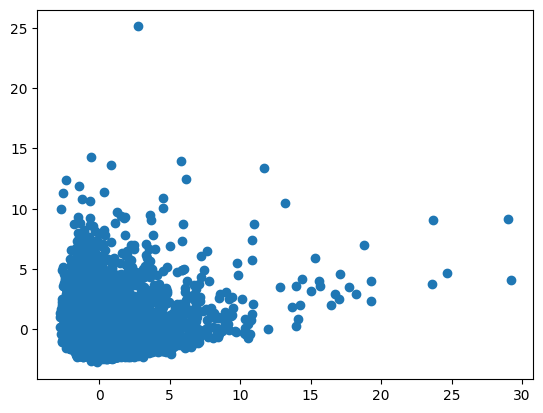

In [ ]:
plt.scatter(data_scaled1[: ,0],data_scaled1[: , 1])

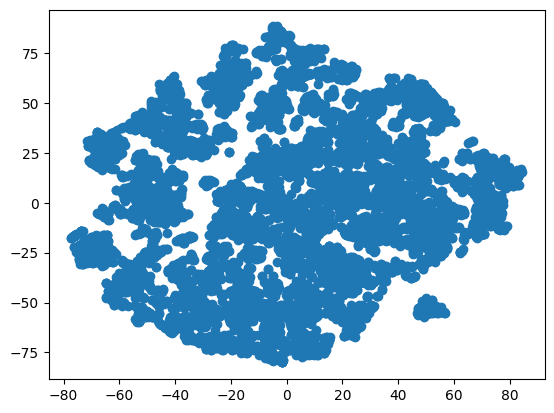

In [ ]:
data_scaled2
plt.scatter(data_scaled2[: ,0],data_scaled2[: , 1])

Cluster Number Prediction with Silhouetee and Davies Bouldin Index as Metrics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

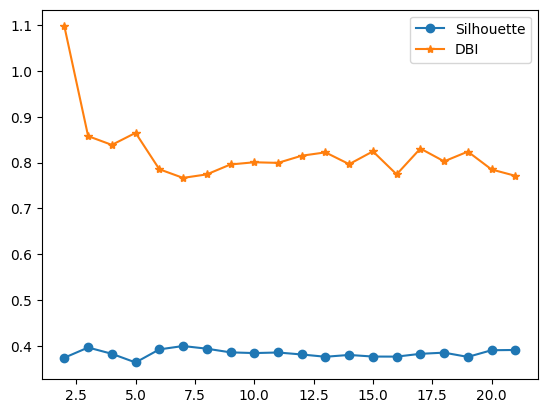

In [ ]:
silhouette = []
davies_bouldin = []
cbi =[]
for i in range(2, 22): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    labels = kmeans.fit_predict(data_scaled2) 
    silhouette.append(silhouette_score(data_scaled2, labels))
    davies_bouldin.append(davies_bouldin_score(data_scaled2,labels))
    cbi.append(calinski_harabasz_score(data_scaled2, labels))
kvalue = range(2, 22)
plot = plt.plot(kvalue, silhouette, marker='o')
plt.plot(kvalue, davies_bouldin, marker='*')
plt.legend(['Silhouette','DBI'])


K-Means with cluster no as 12

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


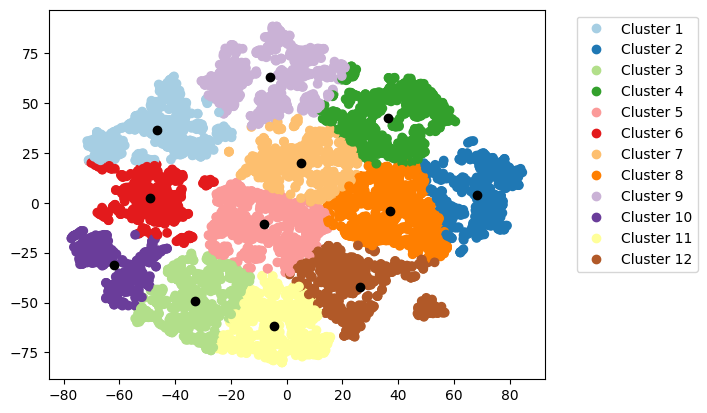

In [ ]:
kmeans = KMeans(n_clusters = 12 , random_state = 0)
labels = kmeans.fit_predict(data_scaled2)
centers = kmeans.cluster_centers_
scatter =  plt.scatter(data_scaled2[:, 0], data_scaled2[:, 1], c=labels , cmap= 'Paired')
plt.scatter(centers[: , 0],centers[: , 1],c= 'black')
plt.legend(*scatter.legend_elements() , bbox_to_anchor=(1.05, 1.0), loc='upper left')
v = ["Cluster 1" , "Cluster 2", "Cluster 3" , "Cluster 4" , "Cluster 5", "Cluster 6" , "Cluster 7","Cluster 8","Cluster 9","Cluster 10","Cluster 11","Cluster 12"]
plt.legend(handles=scatter.legend_elements()[0], labels=v, bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
## K-Means Run Details
print(kmeans.n_iter_)
print(kmeans.inertia_)
print(kmeans.n_features_in_)

64
2084230.375
2


Cluster Characteristics

In [ ]:
df['cluster_result'] = labels + 1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient().hide_index()

<ipython-input-14-f7e0902abde9>:11: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_profile.style.background_gradient().hide_index()


Column Name,Metrics,Cluster 1,Cluster 10,Cluster 11,Cluster 12,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Overall
BALANCE,mean,179.652281,1023.164437,5019.531126,3259.075837,1424.743659,2165.088507,373.628150,1425.148794,1387.371500,899.820255,2039.901226,181.766963,1601.224893
BALANCE_FREQUENCY,mean,0.441386,0.966977,0.982069,0.986440,0.969420,0.995380,0.978669,0.986458,0.812146,0.989653,0.990757,0.662753,0.895035
PURCHASES,mean,336.681466,27.679812,238.975355,1245.935982,5127.425039,35.534123,960.578345,672.646553,304.324390,475.989372,2226.673184,529.554874,1025.433874
ONEOFF_PURCHASES,mean,262.421802,23.888497,171.802664,592.205089,3387.071469,29.598233,84.848357,627.530364,282.365366,141.157534,1533.591363,136.258770,604.901438
INSTALLMENTS_PURCHASES,mean,74.326006,3.833069,67.311585,654.175521,1741.301438,5.935890,875.823916,45.635461,21.997352,335.351317,693.081821,394.157000,420.843533
CASH_ADVANCE,mean,366.607410,764.149471,4935.835623,2417.199439,195.947480,1137.057131,26.737535,321.474632,1803.526574,139.003297,207.118695,191.384617,994.175523
PURCHASES_FREQUENCY,mean,0.176054,0.018995,0.130686,0.750035,0.926402,0.028836,0.963030,0.303826,0.145685,0.594035,0.929870,0.644552,0.496000
ONEOFF_PURCHASES_FREQUENCY,mean,0.094815,0.014993,0.075718,0.244765,0.751923,0.019886,0.044723,0.267457,0.119407,0.078407,0.620201,0.068034,0.205909
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.081204,0.004001,0.060066,0.629052,0.639005,0.007922,0.939084,0.049161,0.037114,0.521533,0.627969,0.549391,0.368820
CASH_ADVANCE_FREQUENCY,mean,0.043480,0.145600,0.471019,0.347085,0.023469,0.277642,0.006145,0.063617,0.261283,0.029183,0.037911,0.035929,0.137604


Biggest Eigen Gap Method to determine optimal cluster number based on SVD

(17, 17)


([<matplotlib.axis.XTick at 0x7f1c601add80>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

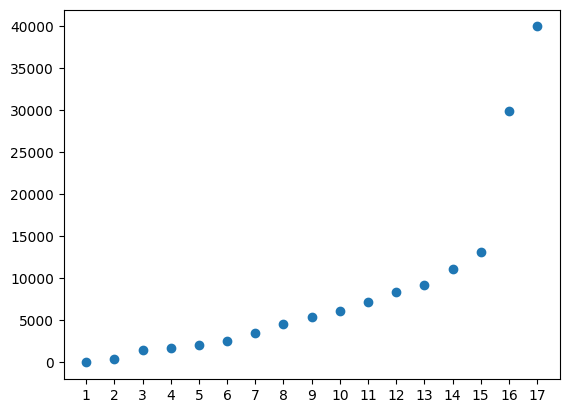

In [ ]:
from numpy.linalg import eig
data_scaled
transpose_matrix = data_scaled.T
req = np.matmul(transpose_matrix, data_scaled)
print(req.shape)
w,v = eig(req)
w.sort()
plt.scatter(range(1,18),w)
plt.xticks(np.arange(1, 18, 1))


Ada Ellip Method (as per research paper)



In [ ]:
cnt = 0
new_df = pd.DataFrame()
fin = []
def calc_eigen_values(data):             ##Calculates EigenValues of matrix
  data = np.array(data)
  transpose_data = data.T
  svd_matrix = np.matmul((transpose_data),(data))
  eigen_val,eigen_vec = eig(svd_matrix)
  eigen_val = sorted(eigen_val, reverse = True)
  return eigen_val

def calc_ks(eigen_val):                ##Calculates no of clusters to split a cluster into based on cluster quality evaluation criterion
  sum = 0
  for i in range(len(eigen_val)):
    sum += eigen_val[i]
  r = 0
  for i in range(len(eigen_val)):
    r += eigen_val[i]
    v = r / sum
    if(v >= 0.6 ):
      return i + 1

def calc_q(curr):                       ## Checks whether cluster quality evaluation criteria is satisfied for a cluster
  curr = calc_eigen_values(curr)
  sum = 0
  for i in range(len(curr)):
    sum += curr[i]
  if(curr[0] / sum >= 0.6):
    return True
  else:
    return False





def ada_ellip(data):  ## Ada-Ellip method called recursively when needed
  global cnt
  global new_df
  global fin
  eigen_val = calc_eigen_values(data)
  k_s  = calc_ks(eigen_val)
  kmeans_labels = KMeans(n_clusters= k_s, n_init = 'auto').fit_predict(data)         ## K-Means on a cluster
  for i in range(0, k_s):
    curr = []
    for j in range(len(kmeans_labels)):
      if(kmeans_labels[j] == i):
        curr.append(data[j])
    if(calc_q(curr)):
      cnt = cnt + 1
      df1 = pd.DataFrame(curr)
      for k in range(len(curr)):
        fin.append(cnt - 1)
      new_df = new_df.append(df1)
      continue
    else:
      ada_ellip(curr)       ##If cluster doesn't meet quality criterion , split it further
  return


ada_ellip(data_scaled)





<ipython-input-16-28da97a02be6>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df1)
<ipython-input-16-28da97a02be6>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df1)
<ipython-input-16-28da97a02be6>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df1)
<ipython-input-16-28da97a02be6>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df1)
<ipython-input-16-28da97a02be6>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(df1)
<ipyt

In [ ]:
print(cnt)      ## Predicted cluster number with Ada-Ellip

24


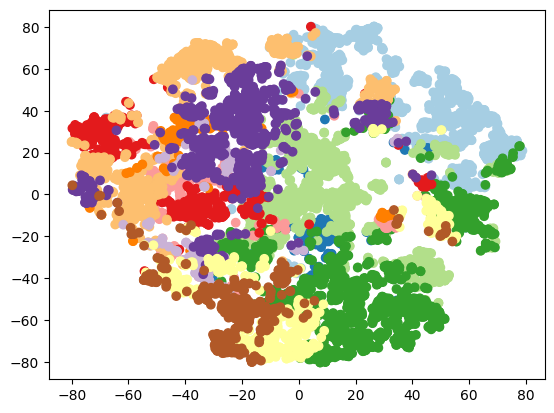

In [ ]:
new_result = TSNE(n_components=2, learning_rate='auto',
            init='random').fit_transform(new_df)
plt.scatter(new_result[:, 0], new_result[:, 1], c= fin , cmap= 'Paired')      ##Ada-Ellip Cluster Results


K-th Nearest Neighbour Classification to determine Epsilon Parameter for DBSCAN

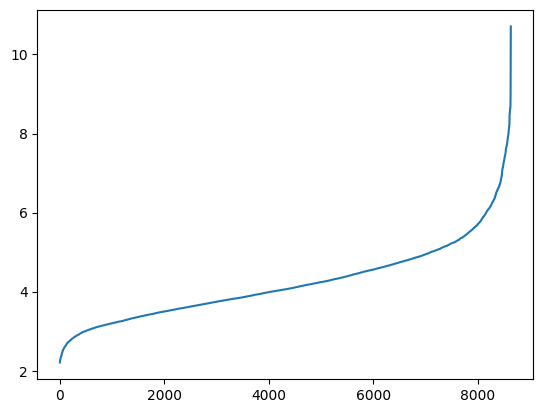

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors =  34)
neigh.fit(data_scaled2)
distances , indices = neigh.kneighbors(data_scaled2)
distances = np.sort(distances , axis = 0)
distances = distances[: ,33 ]
plt.plot(distances)

DBSCAN Clustering

In [ ]:
clustering = DBSCAN(eps = 4.5  ,  min_samples = 34).fit(data_scaled2)
lab = clustering.labels_
n_clusters_ = len(set(lab)) - (1 if -1 in lab else 0)
n_noise_ = list(lab).count(-1)
print(n_clusters_)
print(n_noise_)

21
393


DBSCAN Ouput Generation  Code to find core and non-core samples

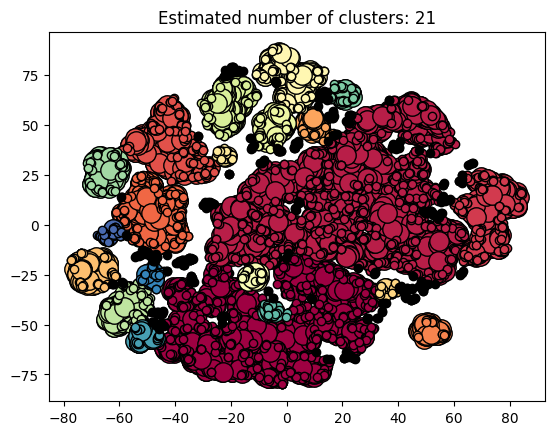

In [ ]:
unique_labels = set(lab)
core_samples_mask = np.zeros_like(lab, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = lab == k

    xy = data_scaled2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data_scaled2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()